In [58]:
# Iportando librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## **1. Cargando el dataframe**

In [59]:
os.getcwd() # Obtener la carpeta como de raiz

df = pd.read_excel('data/Retail_Invoices.xlsx')

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [72]:
print(f'El dataframe tiene un total de {df.shape[0]} filas y {df.shape[1]} columnas')

El dataframe tiene un total de 22190 filas y 6 columnas


## **2. EDA**

### **2.1 Revisión columnas**

In [60]:
# Identificando los tipos de datos y viendo si hay nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


### **Insight**:

- No hay datos nulos.
- InvoiceNo es obj cuando deberia ser numérico.
- Tenemos la mayoría de datos numéricos

In [65]:
# Convirtiendo a numérico InvoiceNo

try:
    
    df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'])

except:
    
    df['InvoiceNo'] = df['InvoiceNo'].astype(str).str.replace(r'[a-zA-Z]+', '', regex=True).astype('int')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  int64         
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.0 MB


### **2.2 Duplicados**

In [69]:
total_duplicados = df.duplicated().sum()

print(f'El total de duplicados es de {total_duplicados}')

El total de duplicados es de 0


In [74]:
numeric_cols = df.drop(columns='InvoiceDate', axis=1).columns.to_list()
numeric_cols

['InvoiceNo', 'CustomerID', 'Quantity', 'price_total', 'StockCode']

## **3. ESTADÍSTICAS PRINCIPALES**

In [78]:
df[numeric_cols[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,22190.0,15238.498738,1733.149624,12346.0,13755.0000,15136.000,16746.0000,18287.0
Quantity,22190.0,221.130599,1170.215301,-80995.0,30.0000,120.000,254.0000,80995.0
price_total,22190.0,374.045327,2018.482869,-168469.6,87.9625,241.505,418.0225,168469.6
StockCode,22190.0,18.333889,23.892111,1.0,3.0000,12.000,24.0000,542.0


**Insights**:

1.  Lo primero que salta a la vista es los valores negativos tanto de Quantity y price_total los que no tienen sentido en el contexto de nuestro problema

2.  Igual puede ser que los valores maximos esten muy altos... pero primero tendremos que sacar los negativos para evitar la influencia de estos en la media.

3.  Hay un usuario que se llevo 542 objetos distintos lo que parece bastante extraño

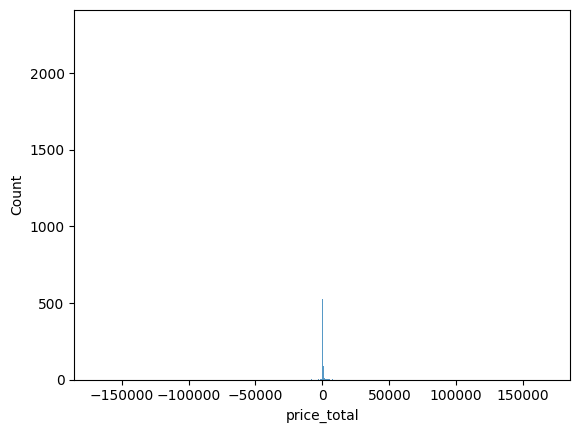

In [ ]:
sns.histplot(df['price_total'])
plt.title('')
plt.show()